In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('~/Desktop/MLfinal/data/pre_and_post_pandemic_together.csv')

df = dataset.copy()

df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
df

,STATION ID,TIME,CHANGE,Year,Month,Day,Weekday,Hour
0,69,2018-10-01 00:00:00,0.000000,2018,10,1,Monday,0
1,69,2018-10-01 01:00:00,0.778499,2018,10,1,Monday,1
2,69,2018-10-01 02:00:00,0.000000,2018,10,1,Monday,2
3,69,2018-10-01 03:00:00,0.000000,2018,10,1,Monday,3
4,69,2018-10-01 04:00:00,6.932576,2018,10,1,Monday,4
...,...,...,...,...,...,...,...,...
62671,98,2021-01-01 19:00:00,0.000000,2021,1,1,Friday,19
62672,98,2021-01-01 20:00:00,0.000000,2021,1,1,Friday,20
62673,98,2021-01-01 21:00:00,0.000000,2021,1,1,Friday,21
62674,98,2021-01-01 22:00:00,0.000000,2021,1,1,Friday,22


In [4]:
df['Days'] = np.arange(len(dataset.index))
df['Name'] = df['STATION ID'].replace({69: 'Grand Canal Dock', 75: 'Frederick St South', 98: 'James St'})

In [5]:
from sklearn.impute import SimpleImputer
values = df['CHANGE'].values
values = values.reshape(-1, 1)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

transformed_values = imputer.fit_transform(values)

df['Change'] = transformed_values
df

,STATION ID,TIME,CHANGE,Year,Month,Day,Weekday,Hour,Days,Name,Change
0,69,2018-10-01 00:00:00,0.000000,2018,10,1,Monday,0,0,Grand Canal Dock,0.000000
1,69,2018-10-01 01:00:00,0.778499,2018,10,1,Monday,1,1,Grand Canal Dock,0.778499
2,69,2018-10-01 02:00:00,0.000000,2018,10,1,Monday,2,2,Grand Canal Dock,0.000000
3,69,2018-10-01 03:00:00,0.000000,2018,10,1,Monday,3,3,Grand Canal Dock,0.000000
4,69,2018-10-01 04:00:00,6.932576,2018,10,1,Monday,4,4,Grand Canal Dock,6.932576
...,...,...,...,...,...,...,...,...,...,...,...
62671,98,2021-01-01 19:00:00,0.000000,2021,1,1,Friday,19,62671,James St,0.000000
62672,98,2021-01-01 20:00:00,0.000000,2021,1,1,Friday,20,62672,James St,0.000000
62673,98,2021-01-01 21:00:00,0.000000,2021,1,1,Friday,21,62673,James St,0.000000
62674,98,2021-01-01 22:00:00,0.000000,2021,1,1,Friday,22,62674,James St,0.000000


In [6]:
df["TIME"] = pd.to_datetime(df["TIME"])
Data = df.pivot_table(index='TIME', columns='Name', values='Change', aggfunc='mean')
Data

Name,Frederick St South,Grand Canal Dock,James St
TIME,,,
2018-08-01 12:00:00,0.983192,0.000000,0.408248
2018-08-01 13:00:00,0.492366,0.996205,0.866025
2018-08-01 14:00:00,0.000000,2.708013,0.514929
2018-08-01 15:00:00,1.055290,2.193309,1.880925
2018-08-01 16:00:00,2.466441,8.425700,1.975225
...,...,...,...
2021-01-01 19:00:00,0.514929,1.348400,0.000000
2021-01-01 20:00:00,0.000000,0.000000,0.000000
2021-01-01 21:00:00,0.000000,0.288675,0.000000


In [7]:

Data['Hours'] = np.arange(len(Data.index))
Data

Name,Frederick St South,Grand Canal Dock,James St,Hours
TIME,,,,
2018-08-01 12:00:00,0.983192,0.000000,0.408248,0
2018-08-01 13:00:00,0.492366,0.996205,0.866025,1
2018-08-01 14:00:00,0.000000,2.708013,0.514929,2
2018-08-01 15:00:00,1.055290,2.193309,1.880925,3
2018-08-01 16:00:00,2.466441,8.425700,1.975225,4
...,...,...,...,...
2021-01-01 19:00:00,0.514929,1.348400,0.000000,20776
2021-01-01 20:00:00,0.000000,0.000000,0.000000,20777
2021-01-01 21:00:00,0.000000,0.288675,0.000000,20778


In [175]:
Pre = Data[Data.index < pd.to_datetime("2020-03-27", format='%Y-%m-%d')]
Pan = Data[Data.index > pd.to_datetime("2020-03-27", format='%Y-%m-%d')]

Name,Frederick St South,Grand Canal Dock,James St,Hours
TIME,,,,
2020-03-27 01:00:00,0.000000,0.000000,0.000000,14038
2020-03-27 02:00:00,0.000000,0.000000,0.000000,14039
2020-03-27 03:00:00,0.000000,0.000000,0.000000,14040
2020-03-27 04:00:00,0.000000,0.000000,0.000000,14041
2020-03-27 05:00:00,0.514929,0.288675,0.492366,14042
...,...,...,...,...
2021-01-01 19:00:00,0.514929,1.348400,0.000000,20776
2021-01-01 20:00:00,0.000000,0.000000,0.000000,20777
2021-01-01 21:00:00,0.000000,0.288675,0.000000,20778


In [118]:
X = Pre['Hours'].values
X = X.reshape(-1, 1)

Grand = Pre['Grand Canal Dock'].values


In [139]:
# actual line for pandemic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

panx = Pan['Hours'].values
panx = panx.reshape(-1,1)

pany = Pan['Grand Canal Dock'].values

poly_pan = PolynomialFeatures(degree=20)
X_pan = poly_pan.fit_transform(panx)
pan_reg = LinearRegression()
pan_reg.fit(X_pan, pany)


LinearRegression()

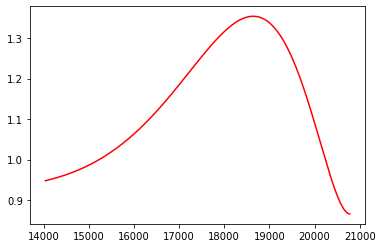

In [140]:
plt.plot(panx, pan_reg.predict(poly_pan.fit_transform(panx)), color='red')

In [172]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Grand)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Grand, test_size=0.3, random_state=42)

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly_reg = PolynomialFeatures(degree=4)

X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))

0.01444268429672202


In [122]:
Z = Pan['Hours'].values
Z = Z.reshape(-1, 1)

Zfit = pol_reg.predict(poly_reg.fit_transform(Z))

In [123]:
dailymean = Data.resample("D").mean()
dailymean['days'] = np.arange(len(dailymean.index))

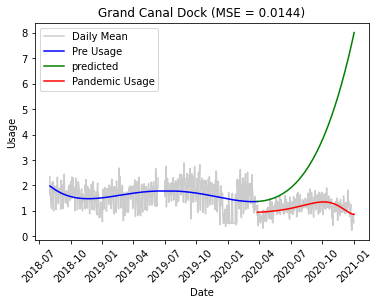

In [173]:
def viz_polymonial():
    plt.plot(dailymean.index, dailymean['Grand Canal Dock'], color = '0.8', label = 'Daily Mean')
    plt.plot(Pre.index, pol_reg.predict(poly_reg.fit_transform(X)), color='blue', label = 'Pre Usage') 
    plt.plot(Pan.index, pol_reg.predict(poly_reg.fit_transform(Z)), color = 'green', label = 'predicted')
    plt.plot(Pan.index, pan_reg.predict(poly_pan.fit_transform(panx)), color='red', label = 'Pandemic Usage')
    plt.title('Grand Canal Dock (MSE = 0.0144)')
    plt.xlabel('Date')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    return
viz_polymonial()